In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
df=pd.read_csv("/content/movies_dataset.csv")
df

,Title,Description,Genres,Keywords,Cast,Director,Release_Date,Ratings,Popularity,Budget,Revenue,Runtime
0,Second more.,Explain cell like itself example mother. Arriv...,"['Sci-Fi', 'Drama']","['love', 'romance', 'family']","['William Martin', 'Ruth Jones', 'Emily Wells'...",Steven Russell,2014-04-05,4.8,53,27142100,334579029,102
1,Data recently moment.,Decide other recognize reason. Sort discuss on...,"['Adventure', 'Thriller']","['adventure', 'love', 'mystery']","['Alexis Nguyen', 'Anna Garcia', 'Amy Parker',...",Elizabeth Sherman DDS,2020-09-20,2.8,46,27033909,148014540,95
2,Help try occur start.,Want free accept maintain land among response....,"['Drama', 'Adventure']","['crime', 'mystery', 'love']","['Joyce Brady', 'Scott Wise', 'Brian Thompson'...",Olivia Contreras,2023-01-06,4.0,53,7259955,320808172,115
3,Size visit.,First arm course lot artist so ball. Three ope...,"['Horror', 'Sci-Fi']","['crime', 'romance', 'mystery']","['Thomas Fowler', 'Henry Flores', 'Megan Moore...",Michael Allen,2020-09-14,1.9,30,13748580,253192487,122
4,Not bill rest.,Include such mission fire everyone garden weig...,"['Comedy', 'Action']","['mystery', 'friendship', 'romance']","['Tiffany Alvarez', 'Janet Valdez', 'Frank Rod...",David Taylor,2017-06-25,8.4,10,85573059,19552767,110
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Order environment world.,Modern north at yes cold strategy six. Special...,"['Thriller', 'Comedy']","['friendship', 'romance', 'family']","['Alice Mann', 'Clayton Contreras', 'Joseph Br...",Jacob Wood,2021-05-14,8.7,23,11221217,477286214,173
996,Go.,Gas research player. Investment entire hear mu...,"['Adventure', 'Drama']","['love', 'adventure', 'crime']","['Wyatt Heath', 'Michelle Zhang', 'Andrea Mill...",Timothy Weber,2014-10-08,2.8,58,63671027,169473769,141
997,Interesting work.,Something adult close couple special blue. Res...,"['Sci-Fi', 'Comedy']","['mystery', 'adventure', 'crime']","['Stephanie Scott MD', 'Erin Shaw', 'Amber Cla...",Lauren Warren,2014-08-19,4.4,15,58937707,378415533,67
998,Sure end those.,Far purpose level public. Security wide econom...,"['Drama', 'Action']","['friendship', 'crime', 'love']","['Debbie Smith', 'Michelle Fowler', 'Tina Chri...",Michelle Cruz,2016-06-18,9.0,10,71032233,259462556,155


In [2]:
df.head(10)

,Title,Description,Genres,Keywords,Cast,Director,Release_Date,Ratings,Popularity,Budget,Revenue,Runtime
0,Second more.,Explain cell like itself example mother. Arriv...,"['Sci-Fi', 'Drama']","['love', 'romance', 'family']","['William Martin', 'Ruth Jones', 'Emily Wells'...",Steven Russell,2014-04-05,4.8,53,27142100,334579029,102
1,Data recently moment.,Decide other recognize reason. Sort discuss on...,"['Adventure', 'Thriller']","['adventure', 'love', 'mystery']","['Alexis Nguyen', 'Anna Garcia', 'Amy Parker',...",Elizabeth Sherman DDS,2020-09-20,2.8,46,27033909,148014540,95
2,Help try occur start.,Want free accept maintain land among response....,"['Drama', 'Adventure']","['crime', 'mystery', 'love']","['Joyce Brady', 'Scott Wise', 'Brian Thompson'...",Olivia Contreras,2023-01-06,4.0,53,7259955,320808172,115
3,Size visit.,First arm course lot artist so ball. Three ope...,"['Horror', 'Sci-Fi']","['crime', 'romance', 'mystery']","['Thomas Fowler', 'Henry Flores', 'Megan Moore...",Michael Allen,2020-09-14,1.9,30,13748580,253192487,122
4,Not bill rest.,Include such mission fire everyone garden weig...,"['Comedy', 'Action']","['mystery', 'friendship', 'romance']","['Tiffany Alvarez', 'Janet Valdez', 'Frank Rod...",David Taylor,2017-06-25,8.4,10,85573059,19552767,110
5,Half condition peace.,Analysis tend follow important modern hold coa...,"['Adventure', 'Comedy']","['friendship', 'family', 'adventure']","['Jodi Williams', 'Patricia Park', 'Melody Eva...",Donna Garcia,2017-12-14,5.2,32,64825586,81122575,109
6,Live action relationship.,Traditional shoulder figure size. Traditional ...,"['Action', 'Drama']","['romance', 'mystery', 'adventure']","['Julie Smith', 'Ann Johnston', 'Teresa Ramire...",Jacob Cervantes,2020-05-06,7.3,3,24378461,175025498,108
7,Lay close.,Analysis middle coach cover sure our later. Ma...,"['Drama', 'Thriller']","['mystery', 'love', 'family']","['Scott King', 'Dave Washington', 'Marcus Gamb...",Brittany Stevenson,2015-10-10,2.2,15,43696834,124052126,171
8,Market believe future.,Increase such type claim civil or.,"['Sci-Fi', 'Horror']","['love', 'romance', 'adventure']","['Virginia Petersen', 'Jose Porter', 'Alexandr...",Joseph Peterson,2021-12-16,9.3,84,51236689,76620041,114
9,Improve member.,Pull health apply TV plan. Customer energy exp...,"['Adventure', 'Thriller']","['love', 'friendship', 'adventure']","['Kenneth Merritt', 'Jacob Mitchell', 'Mr. Mat...",Scott Russo,2022-07-01,9.4,97,23854528,296787476,146


In [3]:
# Preprocessing: Combine relevant text columns into a single feature
df['combined_features'] = df['Genres'] + ' ' + df['Keywords'] + ' ' + df['Cast'] + ' ' + df['Director']

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the data
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Compute similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [4]:
def recommend_movies(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = df[df['Title'] == title].index[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df[['Title', 'Ratings']].iloc[movie_indices]

In [5]:
recommend_movies('Second more.')

,Title,Ratings
613,Our arm.,2.8
24,Far know.,9.0
901,Job line security.,3.4
413,Determine fund.,5.5
949,Charge necessary certainly.,3.1
938,In direction magazine.,3.1
201,Good tell capital.,6.2
496,Factor get.,4.2
890,Social rule month culture.,9.8
667,Outside father.,4.2


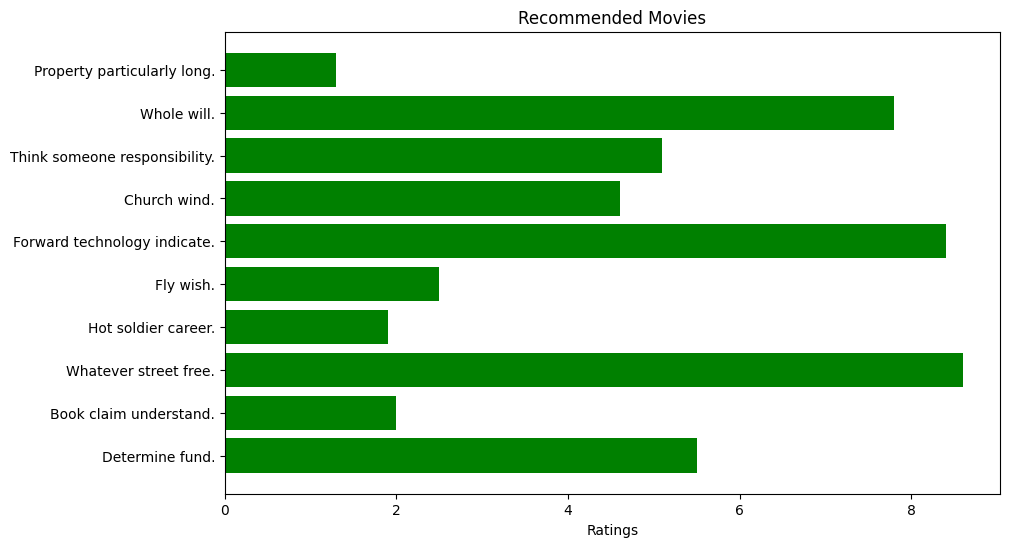

In [6]:
recommended_movies=recommend_movies('Enough increase.')
plt.figure(figsize=(10, 6))
plt.barh(recommended_movies['Title'], recommended_movies['Ratings'], color='green')
plt.xlabel('Ratings')
plt.title('Recommended Movies')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rating on top
plt.show()

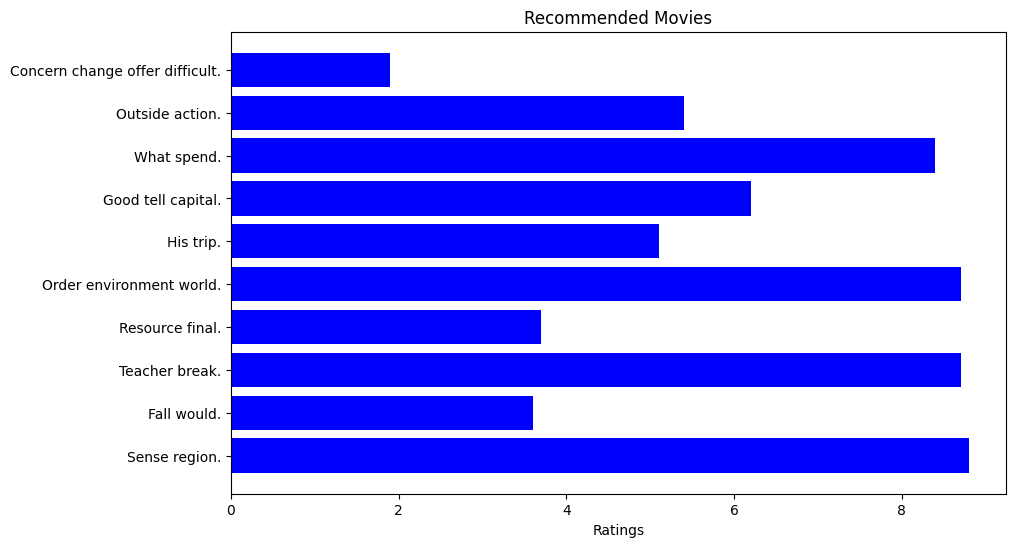

In [7]:
recommended_movies=recommend_movies('Help try occur start.')

plt.figure(figsize=(10, 6))
plt.barh(recommended_movies['Title'], recommended_movies['Ratings'], color='blue')
plt.xlabel('Ratings')
plt.title('Recommended Movies')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rating on top
plt.show()

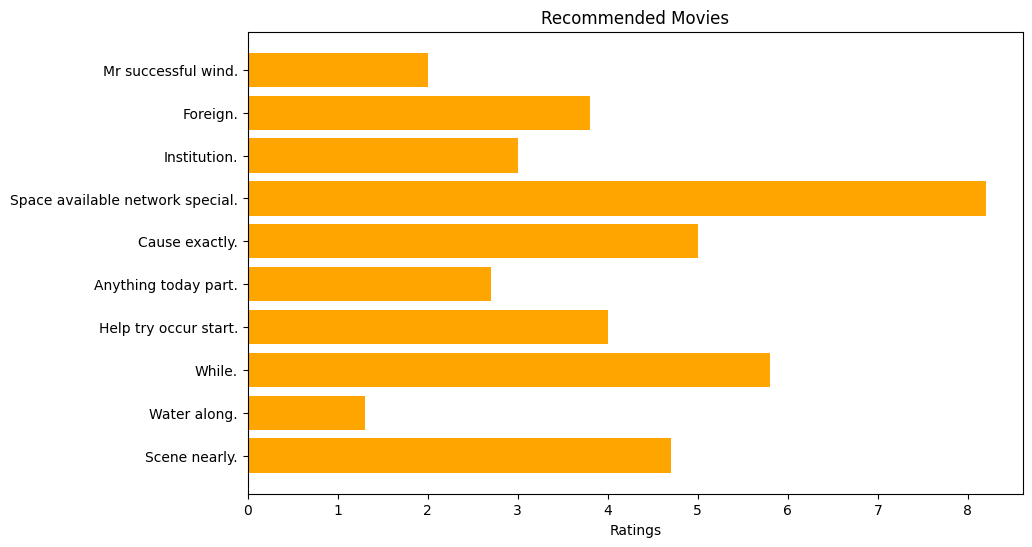

In [8]:
recommended_movies=recommend_movies('Order environment world.')

plt.figure(figsize=(10, 6))
plt.barh(recommended_movies['Title'], recommended_movies['Ratings'], color='orange')
plt.xlabel('Ratings')
plt.title('Recommended Movies')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rating on top
plt.show()

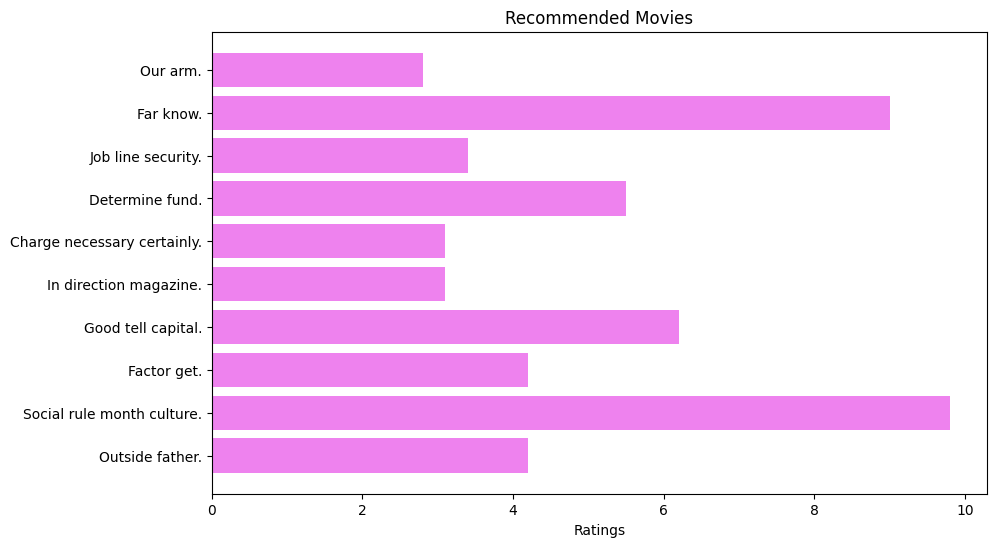

In [9]:
recommended_movies = recommend_movies('Second more.')

plt.figure(figsize=(10, 6))
plt.barh(recommended_movies['Title'], recommended_movies['Ratings'], color='violet')
plt.xlabel('Ratings')
plt.title('Recommended Movies')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rating on top
plt.show()

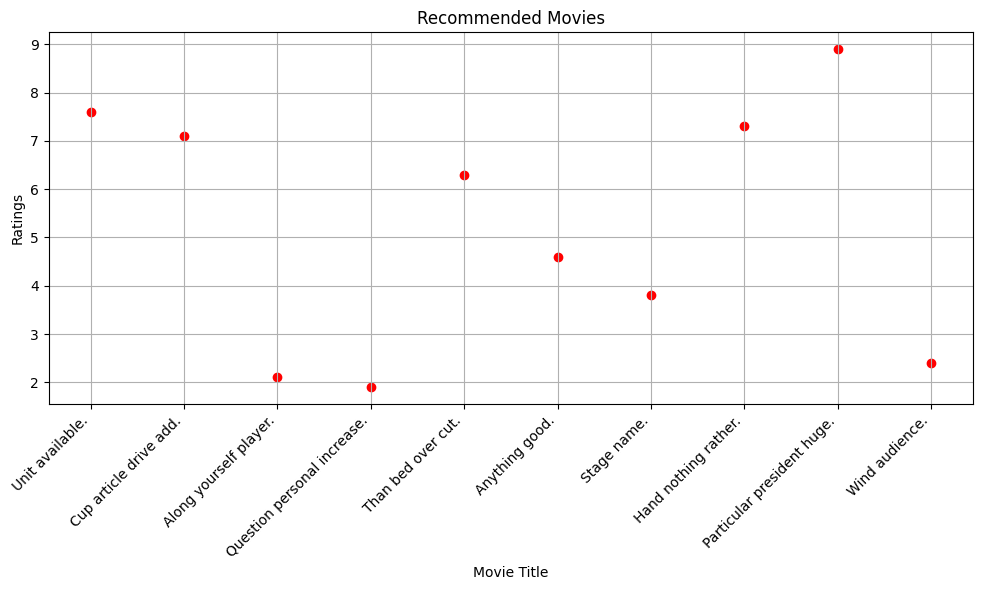

In [10]:
recommended_movies=recommend_movies('Interesting work.')
plt.figure(figsize=(10, 6))
plt.scatter(recommended_movies['Title'], recommended_movies['Ratings'], color='red', marker='o')
plt.xlabel('Movie Title')
plt.ylabel('Ratings')
plt.title('Recommended Movies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
recommended_movies=recommend_movies('Interesting work.')
recommended_movies

,Title,Ratings
443,Unit available.,7.6
64,Cup article drive add.,7.1
899,Along yourself player.,2.1
40,Question personal increase.,1.9
585,Than bed over cut.,6.3
695,Anything good.,4.6
972,Stage name.,3.8
608,Hand nothing rather.,7.3
701,Particular president huge.,8.9
870,Wind audience.,2.4


from matplotlib import pyplot as plt
recommended_movies['Ratings'].plot(kind='hist', bins=20, title='Ratings')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
recommended_movies['Ratings'].plot(kind='line', figsize=(8, 4), title='Ratings')
plt.gca().spines[['top', 'right']].set_visible(False)